# Importación de las librerias necesarias

In [126]:
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Exploración del inicial del Dataset

In [127]:
# Importar el dataset
df = pd.read_csv("csv/Sleep_health_and_lifestyle_dataset.csv")

# Explorar el dataset
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Saber si hay valores nulos

In [128]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Obtener informacion de las columnas

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Describir el DF

In [130]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Hacer print del conteo de cada columna

In [131]:
bmi = df['BMI Category'].value_counts()
print(bmi)

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


In [132]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [133]:
sleep_disorder = df['Sleep Disorder'].value_counts()
print(sleep_disorder
     )

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [134]:
# Cambiar valores de Sleep Disorder de nulos a None
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [135]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

# Visualizar los datos

In [136]:
import plotly.express as px

# Create pie charts for each categorical column except 'Blood Pressure'
for column in df.columns:
    if df[column].dtype == 'object' and column != 'Blood Pressure':
        fig = px.pie(df, names=column, title=column)
        fig.update_layout(width=700, height=450)
        fig.show()

# Create KDE plot for the 'Blood Pressure' column
fig = px.histogram(df, x='Blood Pressure', nbins=20, title='Blood Pressure KDE', marginal='box')
fig.update_layout(width=900, height=450)
fig.show()

## Mostrar matriz de correlacion de la calidad de sueño con respecto a las otras columnas

Haremos una copia del dataframe para no alterar el original con la intención de hacer una matriz de correlación ya que debemos hacer drop de columnas no numericas.

In [137]:
# Mostrar cuales columnas son numericas
df.dtypes[df.dtypes == 'object']

Gender            object
Occupation        object
BMI Category      object
Blood Pressure    object
Sleep Disorder    object
dtype: object

In [138]:
# Hacer una copia del dataframe
sleep_quality_matrix = df.copy()

# Hacer drop de columnas no numericas
sleep_quality_matrix = sleep_quality_matrix.drop(columns=['BMI Category', 'Sleep Disorder', 'Occupation', 'Gender', 'Blood Pressure'])

# Mostrar matriz de correlacion de la calidad de sueño con respecto a las otras columnas
corr_matrix = sleep_quality_matrix.corr()


corr_matrix['Quality of Sleep'].sort_values(ascending=False)

Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Person ID                  0.431612
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64

-----
Rapidamente observamos que 'Sleep Duration', 'Age', 'Heart Rate', 'Stress Level' son aquellas con mayor correlación con la calidad de sueño, tanto de forma postiva como negativa.
Ahora hagamos un ultimo scatter de la matriz de correlacion 

In [139]:
# Calcular los recuentos de cada valor en la columna 'Quality of Sleep'
value_counts = df['Quality of Sleep'].value_counts()

# Hacer un scattermatrix de las columnas 'Quality of Sleep' 

fig = px.scatter_matrix(df, dimensions=['Sleep Duration', 'Age', 'Heart Rate', 'Stress Level' ], color='Quality of Sleep')
fig.update_layout(width=900, height=900)
fig.show()

# Creación del modelo

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [141]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [142]:
sleep_quality_df = df[[ 
        'Gender', 'Age',  
        'Sleep Duration',
        'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
        'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
        'Sleep Disorder']]
sleep_quality_df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [143]:
# Obtener los valores de 'Sleep Duration' y 'Quality of Sleep'
X = sleep_quality_df['Sleep Duration'].values
Y = sleep_quality_df['Quality of Sleep'].values

# Reshape de X e Y para que tengan la forma adecuada para el entrenamiento
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y prueba con anotaciones
print("Este es el X de entrenamiento:", X_train.shape)
print("Este es el X de prueba:", X_test.shape)
print("Este es el Y de entrenamiento:", Y_train.shape)
print("Este es el Y de prueba:", Y_test.shape)

Este es el X de entrenamiento: (299, 1)
Este es el X de prueba: (75, 1)
Este es el Y de entrenamiento: (299, 1)
Este es el Y de prueba: (75, 1)


In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear una instancia del modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
reg.fit(X_train, Y_train)

# Imprimir anotaciones
print("Modelo de regresión lineal entrenado con éxito.")

Modelo de regresión lineal entrenado con éxito.


In [145]:
# Predecir los valores de Y utilizando el modelo entrenado
Y_pred = reg.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(Y_test, Y_pred)

# Imprimir el error cuadrático medio con anotación
print("Mean squared error: %.2f" % mse)

Mean squared error: 0.35


El error cuadrático medio (MSE) es muy alto (0.35), sin embargo, al tener una escala muy pequeña de datos se puede considerar "aceptable"

In [146]:
# Aplanar los arrays X_train e Y_train
X_flat = X_train.flatten()
Y_flat = Y_train.flatten()

# Imprimir anotaciones
print("X_train aplanado con éxito.")
print("Y_train aplanado con éxito.")

X_train aplanado con éxito.
Y_train aplanado con éxito.


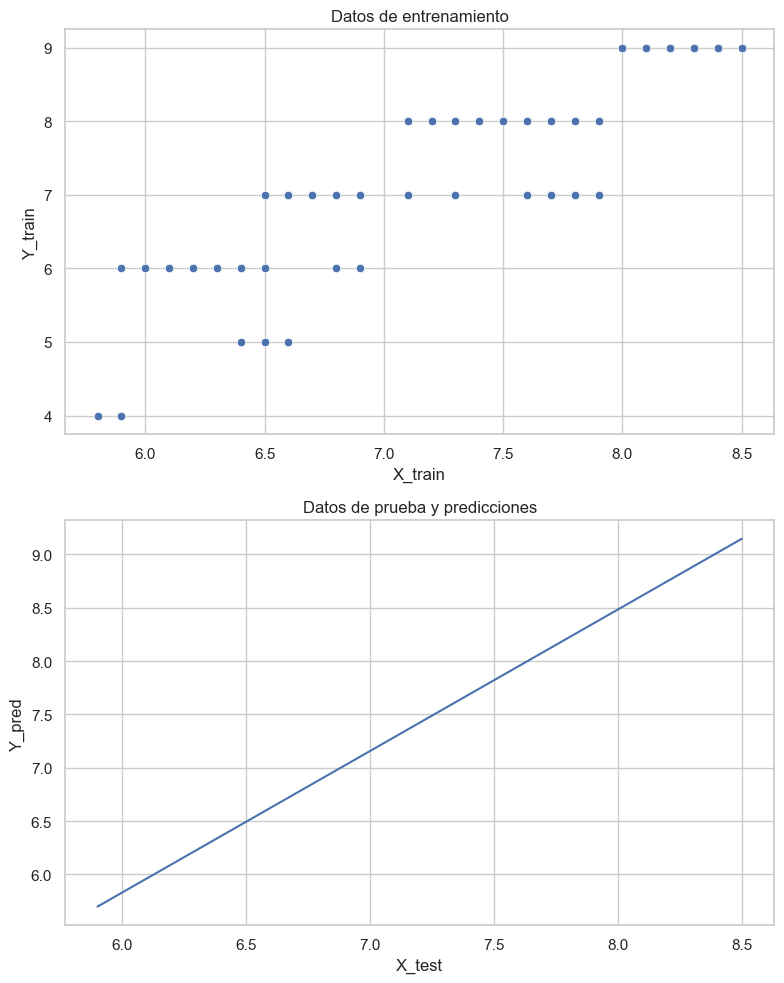

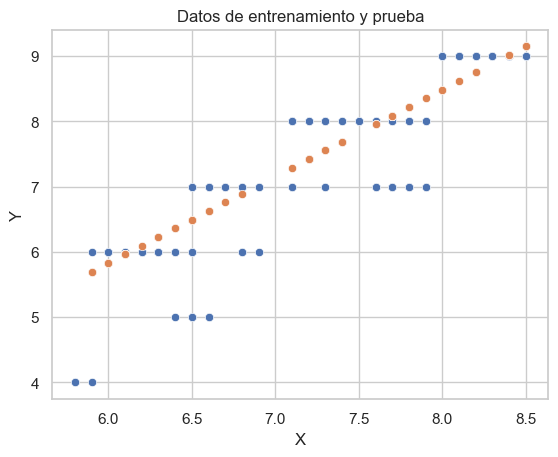

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura y dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Scatter plot de los datos de entrenamiento en el primer subplot
sns.scatterplot(x=X_train.ravel(), y=Y_train.ravel(), ax=ax1)
ax1.set_title("Datos de entrenamiento")
ax1.set_xlabel("X_train")
ax1.set_ylabel("Y_train")

# Line plot de los datos de prueba y predicciones en el segundo subplot
sns.lineplot(x=X_test.ravel(), y=Y_pred.ravel(), ax=ax2)
ax2.set_title("Datos de prueba y predicciones")
ax2.set_xlabel("X_test")
ax2.set_ylabel("Y_pred")

# Ajustar los subplots para evitar superposiciones
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()

# Hacer un plot superpuesto de los datos de entrenamiento y prueba
fig, ax = plt.subplots()
sns.scatterplot(x=X_train.ravel(), y=Y_train.ravel(), ax=ax)
sns.scatterplot(x=X_test.ravel(), y=Y_pred.ravel(), ax=ax)
ax.set_title("Datos de entrenamiento y prueba")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

In [148]:
print("Valor del intercepto:", reg.intercept_)

Valor del intercepto: [-2.12918845]


In [149]:
import pandas as pd

# Crear el DataFrame con los datos reales y predichos
datareal = pd.DataFrame({'X': X_flat, 'Real Y': Y_train.flatten(), 'Predict Y': Y_flat.flatten()})

# Imprimir el DataFrame
datareal

,X,Real Y,Predict Y
0,6.5,6,6
1,6.0,6,6
2,7.5,8,8
3,8.2,9,9
4,6.5,5,5
...,...,...,...
294,6.1,6,6
295,6.1,6,6
296,6.1,6,6
297,8.2,9,9


In [150]:
Y_pred=reg.predict(X_test)

In [151]:
import pandas as pd

# Crear el DataFrame con los datos reales y predichos
datareal = pd.DataFrame({'X': X_test.flatten(), 'Real Y': Y_test.flatten(), 'Predict Y': Y_pred.flatten()})

# Imprimir el DataFrame
datareal

,X,Real Y,Predict Y
0,8.5,9,9.147314
1,6.1,6,5.963360
2,6.0,6,5.830696
3,8.5,9,9.147314
4,6.0,6,5.830696
...,...,...,...
70,7.2,8,7.422673
71,6.5,6,6.494019
72,8.4,9,9.014649
73,6.1,6,5.963360


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Calcular los puntajes de validación cruzada utilizando cross_val_score
scores = cross_val_score(model, X, Y, cv=10)

# Imprimir los puntajes de validación cruzada
print("Puntajes de validación cruzada:", scores)

# Calcular la media de los puntajes de validación cruzada
mean = scores.mean()

# Imprimir la media
print("Media de los puntajes de validación cruzada:", mean)

Puntajes de validación cruzada: [-0.3081857  -0.31479192  0.6548215  -0.41573565  0.58096318  0.84339589
  0.36844992  0.95598937  0.95942008  0.        ]
Media de los puntajes de validación cruzada: 0.33243266608498334


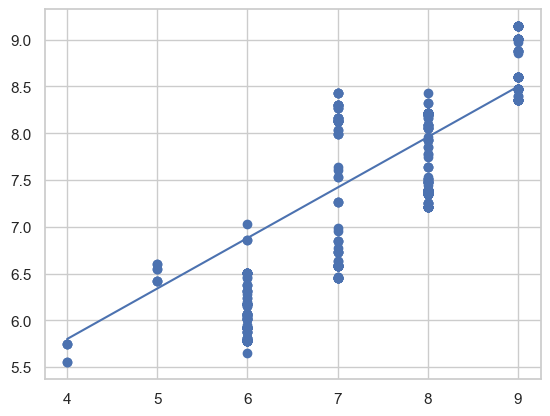

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Realizar la predicción de los valores utilizando validación cruzada
scores = cross_val_predict(model, X, Y, cv=10)

# Trazar el gráfico de dispersión
plt.scatter(Y, scores)
plt.plot([Y.min(), Y.max()], [X.min(), X.max()])

# Mostrar el gráfico
plt.show()

In [154]:
# Calcular el test accuracy
accuracy = sk.metrics.r2_score(Y, scores)

# Imprimir el test accuracy
print("Test accuracy:", accuracy)

# Calcular el train accuracy
accuracy = sk.metrics.r2_score(Y_train, reg.predict(X_train))

# Imprimir el train accuracy
print("Train accuracy:", accuracy)

Test accuracy: 0.7503991140245104
Train accuracy: 0.7817353706292238


Probar modelo con nuevos datos

In [155]:
import numpy as np

input_data = np.array([8.5, 9.0, 7.5, 9.142])  # Add additional data points to test the model

# Reshape the input data to have the same shape as the training data
input_data_reshaped = input_data.reshape(-1, 1)

# Make predictions on the input data
reg.predict(input_data_reshaped)

array([[9.14731407],
       [9.81063775],
       [7.82066672],
       [9.99902167]])

Este resultado nos dice que si durmieramos 9.142 horas tendriamos un descanso practicamente optimo de casi 10.

In [156]:
import joblib

# Guarda el modelo en un archivo
joblib.dump(reg, 'modelo_regresion_lineal.pkl')

['modelo_regresion_lineal.pkl']

# **Creación de un modelo KNN**

## 1.Importar las bibliotecas necesarias

In [157]:
import pandas as pd
import matplotlib.pyplot as plt  # Para graficar
from sklearn.neighbors import KNeighborsClassifier  # Para clasificación
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## 2. Cargar el conjunto de datos y prepararlo

In [158]:
# Importar el dataset
df = pd.read_csv("csv/Sleep_health_and_lifestyle_dataset.csv")

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


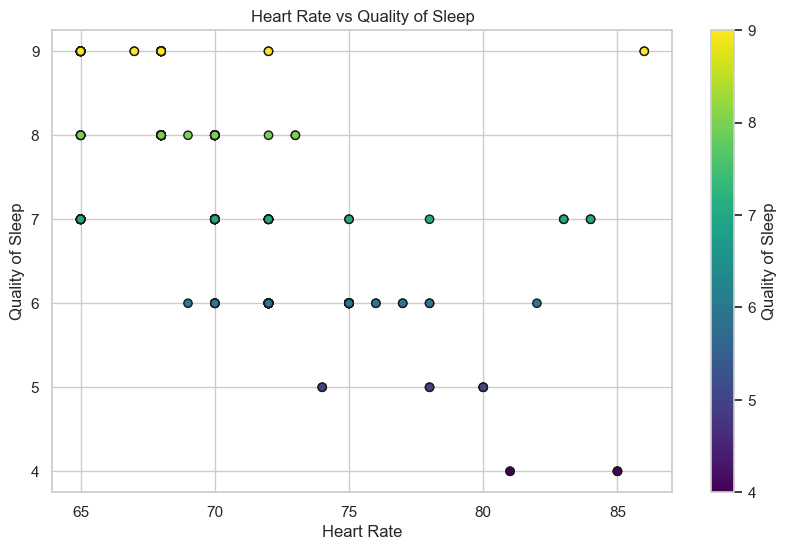

In [159]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df.drop("Heart Rate", axis=1)
y = df["Heart Rate"]


# Hacer plot de los datos
plt.figure(figsize=(10, 6))
plt.scatter(df['Heart Rate'], df['Quality of Sleep'], c=df['Quality of Sleep'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Quality of Sleep')
plt.xlabel('Heart Rate')
plt.ylabel('Quality of Sleep')
plt.title('Heart Rate vs Quality of Sleep')
plt.show()

## 2. Dividir el conjunto de datos en entrenamiento y pruebas

In [160]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['Heart Rate']].values
y = df['Quality of Sleep'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostar los datos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((299, 1), (75, 1), (299,), (75,))

## 3. Crear una instancia del modelo KNN y entrenarlo

In [161]:
# Inicializar el modelo
knn = KNeighborsClassifier(n_neighbors=2)

# Entrear el modelo
knn.fit(X_train, y_train)

# Predecir los valores de Y utilizando el modelo entrenado
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7333333333333333
Classification Report:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       0.93      0.96      0.94        26
           7       0.56      0.94      0.70        16
           8       0.68      0.72      0.70        18
           9       0.00      0.00      0.00        12

    accuracy                           0.73        75
   macro avg       0.53      0.60      0.56        75
weighted avg       0.63      0.73      0.67        75



a:\OneDrive Personal\OneDrive\Escritorio\Modelos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

a:\OneDrive Personal\OneDrive\Escritorio\Modelos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

a:\OneDrive Personal\OneDrive\Escritorio\Modelos\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



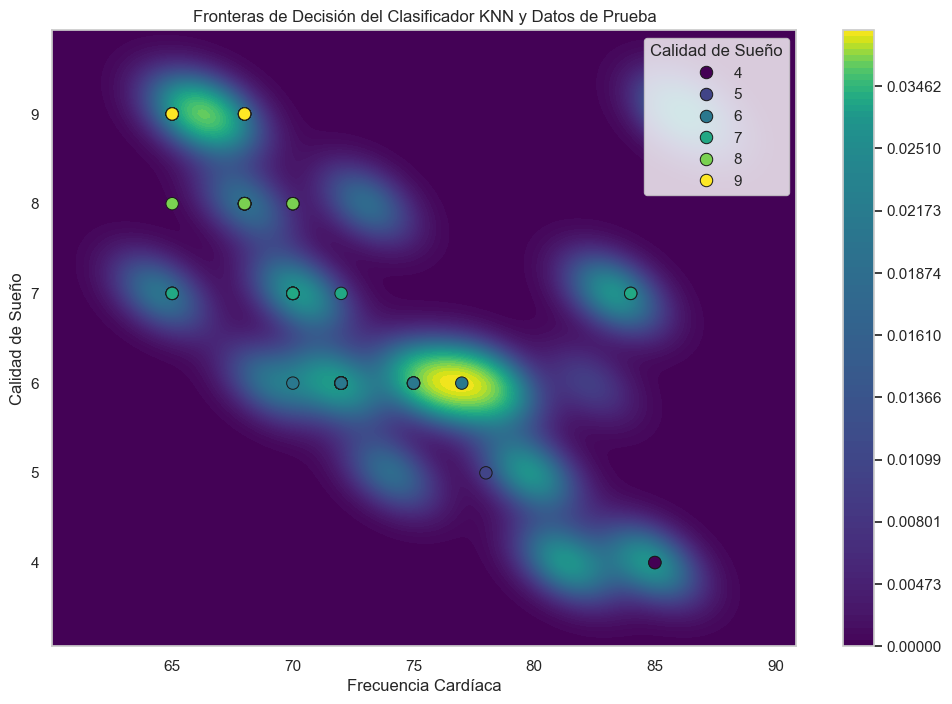

In [162]:
# Corregir las dimensiones del array y crear un DataFrame para los puntos de la malla
df_mesh = pd.DataFrame({'Frecuencia Cardíaca': xx.ravel(), 'Calidad de Sueño Predecida': Z.ravel()})

# Crear la gráfica usando seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Dibujar el fondo de contorno
sns.kdeplot(data=df_mesh, x='Frecuencia Cardíaca', y='Calidad de Sueño Predecida', cmap='viridis', fill=True, thresh=0, levels=100, cbar=True)

# Dibujar los puntos de datos de prueba
sns.scatterplot(data=pd.DataFrame({'Frecuencia Cardíaca': X_test.ravel(), 'Calidad de Sueño': y_test}), x='Frecuencia Cardíaca', y='Calidad de Sueño', hue='Calidad de Sueño', palette='viridis', edgecolor='k', s=80)

# Etiquetas de los ejes y título
plt.xlabel('Frecuencia Cardíaca')
plt.ylabel('Calidad de Sueño')
plt.title('Fronteras de Decisión del Clasificador KNN y Datos de Prueba')
plt.legend(title='Calidad de Sueño', loc='upper right')

# Mostrar la gráfica
plt.show()


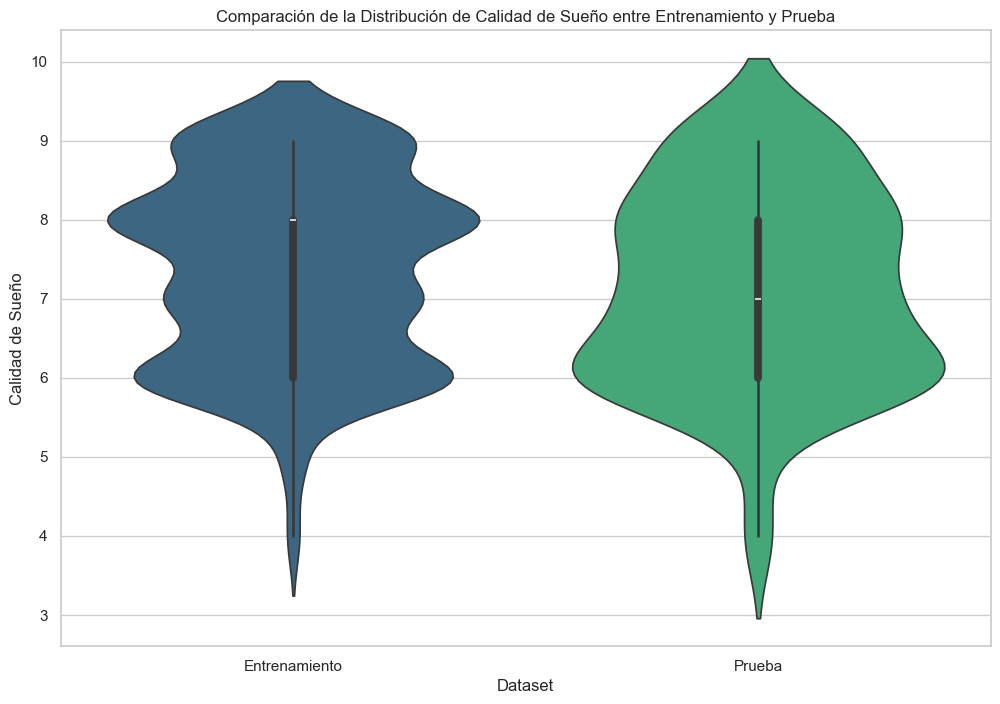

In [168]:
# Create a single data frame combining training and test data
df_combined = pd.concat([
    pd.DataFrame({'Frecuencia Cardíaca': X_train.ravel(), 'Calidad de Sueño': y_train, 'Dataset': 'Entrenamiento'}),
    pd.DataFrame({'Frecuencia Cardíaca': X_test.ravel(), 'Calidad de Sueño': y_test, 'Dataset': 'Prueba'})
])

# Create the plot using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Draw the violin plot for both datasets
sns.violinplot(data=df_combined, x='Dataset', y='Calidad de Sueño', hue='Dataset', palette='viridis')

# Axis labels and title
plt.xlabel('Dataset')
plt.ylabel('Calidad de Sueño')
plt.title('Comparación de la Distribución de Calidad de Sueño entre Entrenamiento y Prueba')

# Show the plot
plt.show()

In [169]:
# Guardar el modelo
joblib.dump(knn, 'modelo_knn.pkl')

['modelo_knn.pkl']